# Initial Data

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv('./data/heart.csv', na_values="?")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Cleaning

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [4]:

missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

ca_indices = df[df['ca'].isna()].index
print("\n\"ca\" NANs: ")
print( df['ca'][ca_indices])

thal_indices = df[df['thal'].isna()].index
print("\n\"thal\" NANs: ")
print(df['thal'][thal_indices])


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

"ca" NANs: 
166   NaN
192   NaN
287   NaN
302   NaN
Name: ca, dtype: float64

"thal" NANs: 
87    NaN
266   NaN
Name: thal, dtype: float64


In [5]:
# input missing data by Median strategy
imputer = SimpleImputer(strategy='median') 
df[['ca']] = imputer.fit_transform(df[['ca']])
df[['thal']] = imputer.fit_transform(df[['thal']])

In [6]:

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

print("\n\"ca\" NANs: ")
print( df['ca'][ca_indices])

print("\n\"thal\" NANs: ")
print(df['thal'][thal_indices])


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

"ca" NANs: 
166    0.0
192    0.0
287    0.0
302    0.0
Name: ca, dtype: float64

"thal" NANs: 
87     3.0
266    3.0
Name: thal, dtype: float64


In [7]:
x = df.drop('num', axis=1)
y = df['num']

print("Cleaned Data:")
x


Cleaned Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


# Train Test Spliting

In [8]:
from sklearn.model_selection import train_test_split

In [9]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
print("x_train Dim = ",x_train.shape)
print("x_test Dim = ",x_test.shape)

x_train Dim =  (242, 13)
x_test Dim =  (61, 13)


# Logestic Regression

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Standard
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)


In [12]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def ShowROC():
    y_proba = model.predict_proba(x_test)

    plt.figure(figsize=(12, 8))
    bins = [i / 20 for i in range(20)] + [1]
    classes = model.classes_
    roc_auc_ovr = {}

    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliary dataframe to help with the plots
        df_aux = x_test.copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop=True)

        # # Plots the probability distribution for the class and the rest
        # ax = plt.subplot(2, 3, i + 1)
        # sns.histplot(x="prob", data=df_aux, hue='class', color='b', ax=ax, bins=bins)
        # ax.set_title(c)
        # ax.legend([f"Class: {c}", "Rest"])
        # ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, 6)
        fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
        roc_auc = auc(fpr, tpr)

        ax_bottom.plot(fpr, tpr, lw=2, label=f'Class {c} (AUC = {roc_auc:.2f})')
        ax_bottom.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax_bottom.set_title("ROC Curve OvR")
        ax_bottom.set_xlabel('False Positive Rate')
        ax_bottom.set_ylabel('True Positive Rate')
        ax_bottom.legend(loc="lower right")

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc

    plt.tight_layout()
    plt.show()

Accuracy: 0.6065573770491803

Confusion Matrix:
[[34  4  0  0  1]
 [ 1  2  2  1  0]
 [ 1  4  0  3  0]
 [ 0  1  2  1  0]
 [ 0  1  0  3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.17      0.33      0.22         6
           2       0.00      0.00      0.00         8
           3       0.12      0.25      0.17         4
           4       0.00      0.00      0.00         4

    accuracy                           0.61        61
   macro avg       0.25      0.29      0.26        61
weighted avg       0.63      0.61      0.61        61



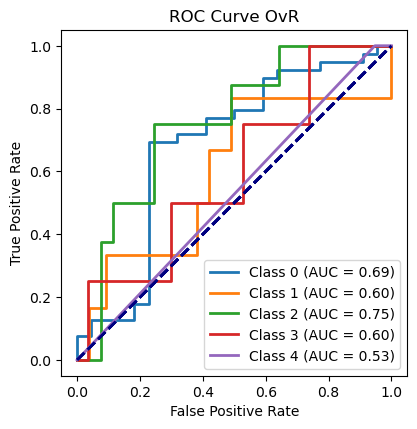

In [13]:

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

ShowROC()


## BY L1

In [14]:
model = LogisticRegression(solver='liblinear',penalty='l1', random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

Accuracy: 0.639344262295082

Confusion Matrix:
[[36  3  0  0  0]
 [ 1  2  2  1  0]
 [ 1  5  0  2  0]
 [ 0  1  2  1  0]
 [ 0  2  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.15      0.33      0.21         6
           2       0.00      0.00      0.00         8
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         4

    accuracy                           0.64        61
   macro avg       0.26      0.30      0.27        61
weighted avg       0.63      0.64      0.63        61



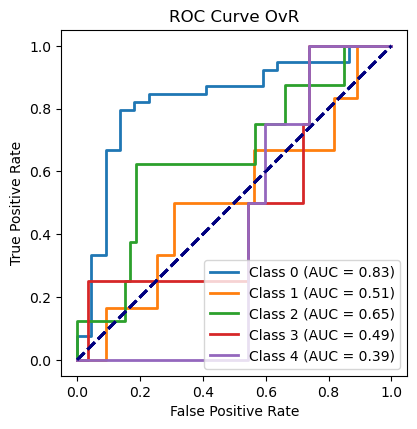

In [15]:

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

ShowROC()


## By L2

In [16]:
model = LogisticRegression(penalty='l2', C=1e-4, random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

Accuracy: 0.639344262295082

Confusion Matrix:
[[39  0  0  0  0]
 [ 6  0  0  0  0]
 [ 8  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        39
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.64        61
   macro avg       0.13      0.20      0.16        61
weighted avg       0.41      0.64      0.50        61



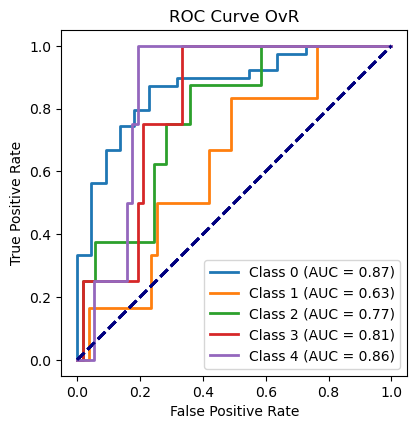

In [17]:

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity and Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

ShowROC()


    Best Model is : L2 Regularization ib LogisticRegression

# Importance Features

In [18]:
coefficients = model.coef_
feature_names = x.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)


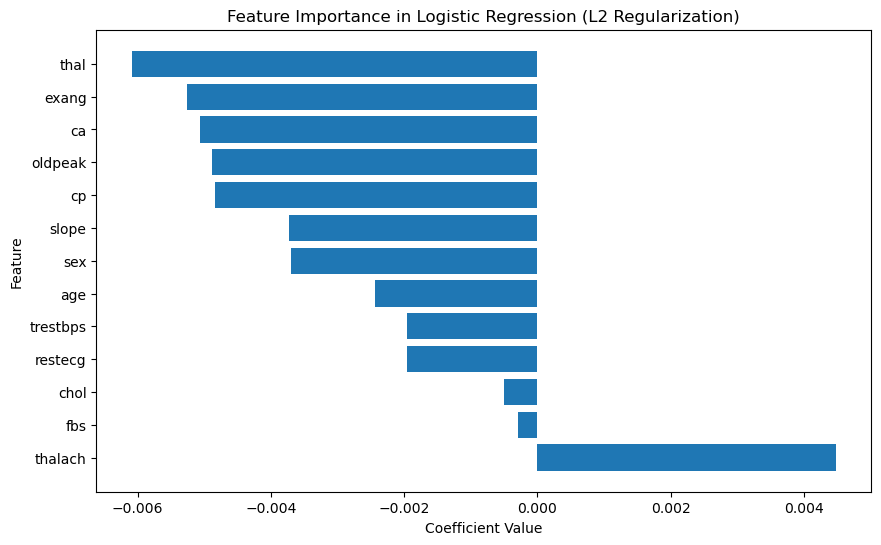

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression (L2 Regularization)')
plt.show()

In [20]:
print("Feature Coefficients:")
coefficients_df

Feature Coefficients:


,Feature,Coefficient
7,thalach,0.004480
5,fbs,-0.000289
4,chol,-0.000499
6,restecg,-0.001958
3,trestbps,-0.001964
0,age,-0.002433
1,sex,-0.003694
10,slope,-0.003723
2,cp,-0.004836
9,oldpeak,-0.004880
